# Intelici Challenge - Graph Classification

In [0]:
By: Gal Hever

In this challenge you'll be classifying graphs, which is the basis for the work we do at Intelici.

This is a binary classification challenge with 992 graphs in the training set, and 121 in the test set. In order to extract graph features, you may use all algorithms and functions that networkx (or any other library) provides you, or write your own.

We don't have the ground truth for this data. Instead, four annotators with different skill levels tagged the data, so you'll need to find a way to obtain labels to use for training.

The purpose of this challenge is to see how you work. Writing clean and orderly code and demonstrating understanding is more important than receiving perfect results.

# Layout
- graphs/ contains 1113 graph files in edge list format
- classes_train.csv contains 5 columns: Graph filename, Annotator 1, Annotator 2, Annotator 3, Annotator 4
- classes_test.csv contains 2 columns: Graph filenae, class

### Import Data

In [0]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [0]:
from google.colab import files
uploaded = files.upload()

Saving 1 to 1
Saving 2 to 2
Saving 3 to 3
Saving 4 to 4
Saving 5 to 5
Saving 6 to 6
Saving 7 to 7
Saving 8 to 8
Saving 9 to 9
Saving 10 to 10
Saving 11 to 11
Saving 12 to 12
Saving 13 to 13
Saving 14 to 14
Saving 15 to 15
Saving 16 to 16
Saving 17 to 17
Saving 18 to 18
Saving 19 to 19
Saving 20 to 20
Saving 21 to 21
Saving 22 to 22
Saving 23 to 23
Saving 24 to 24
Saving 25 to 25
Saving 26 to 26
Saving 27 to 27
Saving 28 to 28
Saving 29 to 29
Saving 30 to 30
Saving 31 to 31
Saving 32 to 32
Saving 33 to 33
Saving 34 to 34
Saving 35 to 35
Saving 36 to 36
Saving 37 to 37
Saving 38 to 38
Saving 39 to 39
Saving 40 to 40
Saving 41 to 41
Saving 42 to 42
Saving 43 to 43
Saving 44 to 44
Saving 45 to 45
Saving 46 to 46
Saving 47 to 47
Saving 48 to 48
Saving 49 to 49
Saving 50 to 50
Saving 51 to 51
Saving 52 to 52
Saving 53 to 53
Saving 54 to 54
Saving 55 to 55
Saving 56 to 56
Saving 57 to 57
Saving 58 to 58
Saving 59 to 59
Saving 60 to 60
Saving 61 to 61
Saving 62 to 62
Saving 63 to 63
Saving 64 

In [0]:
# remove files
!rm '1 (1)'

In [0]:
import os
n_files=len([uploaded for uploaded in os.listdir('.') if (os.path.isfile(uploaded))])

In [0]:
df = pd.DataFrame(index=range(1,n_files+1),columns=['edges','nodes','avg_edg','avg_deg','med_edg','med_deg','IQR_edg','IQR_deg','STD_edg','STD_deg','STD_deg', 'Total_edg','Total_deg','Total_deg','is_connected','avg_length','radius','diameter','eccentricity','center','periphery','density','n.connected.comp','n.of_isolates','is_distance_regular','is_eulerian', 'label'])

In [0]:
from operator import itemgetter 
def get_edg(i):
  edg=list(map(itemgetter(i), G.edges()))
  count_vals=list(pd.Index(edg).value_counts())
  return count_vals

In [0]:
for filename in range(1,n_files+1):
  if(type(filename)==int):
    G=nx.read_adjlist(str(filename), nodetype=int)
    deg=list(dict(G.degree()).values())
    edg=get_edg(0)
    df.xs(filename)['edges']=G.size() #The number of edges
    df.xs(filename)['nodes']=len(G)#Total amount of nodes
    df.xs(filename)['avg_edg']= np.mean(edg)#Average connections for each node
    df.xs(filename)['avg_deg']= np.mean(deg)#Average degree for each node
    df.xs(filename)['med_edg']= np.median(edg)#Median connections for each node
    df.xs(filename)['med_deg']= np.median(deg)#Median degree for each node
    df.xs(filename)['IQR_edg']= np.subtract(*np.percentile(edg, [75, 25]))#IQR connections for each node
    df.xs(filename)['IQR_deg']= np.subtract(*np.percentile(deg, [75, 25]))#IQR degree
    df.xs(filename)['STD_edg']= np.std(edg)#STD connections for each node
    df.xs(filename)['STD_deg']= np.std(deg)#STD degree
    df.xs(filename)['Total_edg']= np.sum(edg)#Total sum of connections
    df.xs(filename)['Total_deg']= np.sum(deg)#Total sum of degrees
    df.xs(filename)['is_connected']= nx.is_connected(G)
    if(nx.is_connected(G)):
      df.xs(filename)['avg_length']= nx.average_shortest_path_length(G)
      df.xs(filename)['radius']= nx.radius(G)
      df.xs(filename)['diameter']= nx.diameter(G)
      ecc= nx.eccentricity(G) # The eccentricity of a node v is the maximum distance from v to all other nodes in G
      df.xs(filename)['eccentricity']= sum(ecc.values()) # sum the eccentricity
      df.xs(filename)['center']= len(nx.center(G)) # The center is the set of nodes with eccentricity equal to radius.
      df.xs(filename)['periphery']= len(nx.periphery(G))# The periphery is the set of nodes with eccentricity equal to the diameter.
    else:
      sum_avg_short= 0
      diameter= 0
      radius= 0
      ecc_sum= 0
      len_center= 0
      len_periphery= 0      
      for g in nx.connected_component_subgraphs(G):
        sum_avg_short+= nx.average_shortest_path_length(g)  
        radius+= nx.radius(g)
        diameter+= nx.diameter(g)           
        ecc= nx.eccentricity(g) # The eccentricity of a node v is the maximum distance from v to all other nodes in G
        ecc_sum+= sum(ecc.values())
        center=nx.center(g)
        len_center+=len(nx.center(g))
        len_periphery+=len(nx.periphery(g))
      df.xs(filename)['avg_length']= sum_avg_short/nx.number_connected_components(G)
      df.xs(filename)['radius']= radius/nx.number_connected_components(G)
      df.xs(filename)['diameter']= diameter/nx.number_connected_components(G)     
      df.xs(filename)['eccentricity']= ecc_sum/nx.number_connected_components(G) # sum the eccentricity
      df.xs(filename)['center']= len_center/nx.number_connected_components(G) # The center is the set of nodes with eccentricity equal to radius.
      df.xs(filename)['periphery']= len_periphery/nx.number_connected_components(G)# The periphery is the set of nodes with eccentricity equal to the diameter.     
    df.xs(filename)['density']= nx.density(G)
    df.xs(filename)['n.connected.comp']= nx.number_connected_components(G)# How many groups
    df.xs(filename)['n.of_isolates']= nx.number_of_isolates(G)# Returns the number of isolates in the graph.
    df.xs(filename)['is_distance_regular']= nx.is_distance_regular(G)
    df.xs(filename)['is_eulerian']= nx.is_eulerian(G)

In [0]:
df.to_csv('data.csv')
files.download('data.csv')
# df=pd.read_csv('data.csv')

In [0]:
uploaded = files.upload()

Saving labels_test.csv to labels_test.csv
Saving labels_train.csv to labels_train.csv


In [0]:
data=df.copy()

In [0]:
import io
labels_train = pd.read_csv(io.BytesIO(uploaded['labels_train.csv']), names=['graph','label1','label2', 'label3', 'label4'])
labels_test = pd.read_csv(io.BytesIO(uploaded['labels_test.csv']), names=['graph','label'])

In [0]:
def get_labels(df, csv):
  for i in range(1,len(csv)):
    row=csv.loc[i,'graph']
    df.loc[row,'label']=csv.loc[i,'label']
  return df

In [0]:
labels_train['label']=labels_train.apply(lambda x: 1 if np.mean(x[1:5])>0.5 else(0 if np.mean(x[1:5])<0.5 else np.nan), axis=1)

In [0]:
df = get_labels(df, labels_test)
df = get_labels(df, labels_train)

In [0]:
cols=list(df.columns)
cols.remove('label')

In [0]:
for col in cols:
    df[col] = df[col].astype('int64')

#### KNN Imputer 

In [0]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(3, weights='distance')
not_null_x=df[~df.isnull().any(axis=1)].drop('label', axis=1)
not_null_y=df.loc[~df.isnull().any(axis=1),'label']
not_null_y=not_null_y.astype('int')
trained_model = clf.fit(not_null_x, not_null_y)

In [0]:
predicted_labels = trained_model.predict(df[df.isnull().any(axis=1)].drop('label', axis=1))

In [0]:
df.loc[df.isnull().any(axis=1),'label']=predicted_labels

In [0]:
df['label'] = df['label'].astype('int64')

### Exploratory Data Analysis (EDA)


In order to understand the data, it is common to begin with descriptive statistics analysis before the pre-processing section and model building

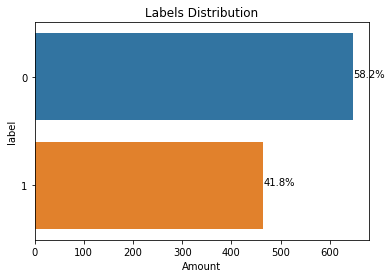

In [0]:
ax = sns.countplot(y="label", data=df)
plt.title('Labels Distribution')
plt.xlabel('Amount')

total = len(df['label'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

In [0]:
df.shape

(1113, 27)

In [0]:
# Check features datatypes
types = df.dtypes
pd.DataFrame(types)

,0
edges,int64
nodes,int64
avg_edg,int64
avg_deg,int64
med_edg,int64
med_deg,int64
IQR_edg,int64
IQR_deg,int64
STD_edg,int64
STD_deg,int64


In [0]:
df.columns

Index(['edges', 'nodes', 'avg_edg', 'avg_deg', 'med_edg', 'med_deg', 'IQR_edg',
       'IQR_deg', 'STD_edg', 'STD_deg', 'STD_deg', 'Total_edg', 'Total_deg',
       'Total_deg', 'is_connected', 'avg_length', 'radius', 'diameter',
       'eccentricity', 'center', 'periphery', 'density', 'n.connected.comp',
       'n.of_isolates', 'is_distance_regular', 'is_eulerian', 'label'],
      dtype='object')

In [0]:

# df=df.dropna()
# df.drop(df.tail(1).index,inplace=True) # drop last n rows

In [0]:
df.shape
# drop unnecessary features
# df=df.drop("Unnamed: 0",axis=1)

(1113, 27)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113 entries, 1 to 1113
Data columns (total 27 columns):
edges                  1113 non-null int64
nodes                  1113 non-null int64
avg_edg                1113 non-null int64
avg_deg                1113 non-null int64
med_edg                1113 non-null int64
med_deg                1113 non-null int64
IQR_edg                1113 non-null int64
IQR_deg                1113 non-null int64
STD_edg                1113 non-null int64
STD_deg                1113 non-null int64
STD_deg                1113 non-null int64
Total_edg              1113 non-null int64
Total_deg              1113 non-null int64
Total_deg              1113 non-null int64
is_connected           1113 non-null int64
avg_length             1113 non-null int64
radius                 1113 non-null int64
diameter               1113 non-null int64
eccentricity           1113 non-null int64
center                 1113 non-null int64
periphery              1113 non-n

In [0]:
df.isnull().sum()

edges                  0
nodes                  0
avg_edg                0
avg_deg                0
med_edg                0
med_deg                0
IQR_edg                0
IQR_deg                0
STD_edg                0
STD_deg                0
STD_deg                0
Total_edg              0
Total_deg              0
Total_deg              0
is_connected           0
avg_length             0
radius                 0
diameter               0
eccentricity           0
center                 0
periphery              0
density                0
n.connected.comp       0
n.of_isolates          0
is_distance_regular    0
is_eulerian            0
label                  0
dtype: int64

In [0]:
df.nunique()

edges                  223
nodes                  148
avg_edg                  3
avg_deg                  5
med_edg                  3
med_deg                  5
IQR_edg                  4
IQR_deg                  4
STD_edg                  3
STD_deg                  3
STD_deg                  3
Total_edg              223
Total_deg              223
Total_deg              223
is_connected             2
avg_length              18
radius                  24
diameter                44
eccentricity           605
center                  13
periphery               17
density                  2
n.connected.comp         7
n.of_isolates            1
is_distance_regular      2
is_eulerian              2
label                    2
dtype: int64

In [0]:
df=df.drop('n.of_isolates',axis=1)

In [0]:
df.head()

,edges,nodes,avg_edg,avg_deg,med_edg,med_deg,IQR_edg,IQR_deg,STD_edg,STD_deg,STD_deg,Total_edg,Total_deg,Total_deg,is_connected,avg_length,radius,diameter,eccentricity,center,periphery,density,n.connected.comp,n.of_isolates,is_distance_regular,is_eulerian,label
1,81,42,2,3,2,3,2,1,1,1,1,81,162,162,1,5,7,14,455,1,3,0,1,0,0,0,0
2,46,27,1,3,2,3,1,1,0,0,0,46,92,92,1,5,8,15,319,2,5,0,1,0,0,0,0
3,17,10,2,3,2,3,0,0,0,0,0,17,34,34,1,2,2,4,35,1,6,0,1,0,0,0,1
4,46,24,2,3,2,3,1,1,0,1,1,46,92,92,1,2,3,6,121,1,9,0,1,0,0,0,0
5,21,11,2,3,2,3,2,2,0,0,0,21,42,42,1,2,2,4,37,1,5,0,1,0,0,0,0


In [0]:
def describe(df):
    return pd.concat([df.describe().T,
                      df.mad().rename('mad'),
                      df.skew().rename('skew'),
                      df.kurt().rename('kurt'),
                     ], axis=1).T

# Descriptive statistics
describe(df)

,edges,nodes,avg_edg,avg_deg,med_edg,med_deg,IQR_edg,IQR_deg,STD_edg,STD_deg,STD_deg,Total_edg,Total_deg,Total_deg,is_connected,avg_length,radius,diameter,eccentricity,center,periphery,density,n.connected.comp,is_distance_regular,is_eulerian,label
count,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000
mean,72.815813,39.053010,1.795148,3.248877,2.010782,3.553459,1.165319,1.113208,0.475292,0.293801,0.293801,72.815813,145.631626,145.631626,0.962264,4.203953,6.029650,11.489668,522.327044,2.787062,5.270440,0.010782,1.073675,0.010782,0.001797,0.417790
std,84.637076,45.775943,0.410402,0.508967,0.257741,0.610953,0.621542,0.531165,0.503201,0.459636,0.459636,84.637076,169.274151,169.274151,0.190642,2.713990,3.951143,7.858239,1279.851244,1.871438,2.031585,0.103320,0.512399,0.103320,0.042371,0.493417
min,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,10.000000,10.000000,0.000000,1.000000,1.000000,1.000000,4.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,28.000000,15.000000,2.000000,3.000000,2.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,28.000000,56.000000,56.000000,1.000000,2.000000,3.000000,6.000000,74.000000,1.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,49.000000,26.000000,2.000000,3.000000,2.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,49.000000,98.000000,98.000000,1.000000,4.000000,5.000000,10.000000,202.000000,2.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,87.000000,45.000000,2.000000,4.000000,2.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000,87.000000,174.000000,174.000000,1.000000,5.000000,8.000000,15.000000,484.000000,4.000000,6.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1049.000000,620.000000,3.000000,5.000000,3.000000,5.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1049.000000,2098.000000,2098.000000,1.000000,23.000000,32.000000,64.000000,30492.000000,16.000000,18.000000,1.000000,9.000000,1.000000,1.000000,1.000000
mad,49.402454,26.514456,0.330062,0.422904,0.076436,0.558296,0.475743,0.347828,0.500487,0.416019,0.416019,49.402454,98.804907,98.804907,0.072624,2.054590,2.972133,5.942054,538.216854,1.363242,1.411054,0.021331,0.141789,0.021331,0.003587,0.486483
skew,5.241192,5.227466,-1.346709,0.428885,0.505610,0.008443,0.007194,0.467900,0.141502,0.962161,0.962161,5.241192,5.241192,5.241192,-4.858273,1.448250,1.399835,1.432436,13.596208,2.156567,1.726298,9.487013,10.520455,9.487013,23.558381,0.333828


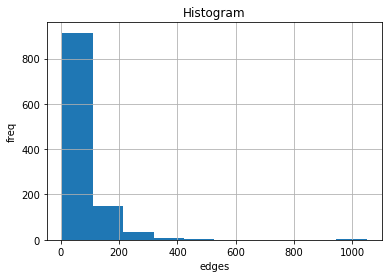

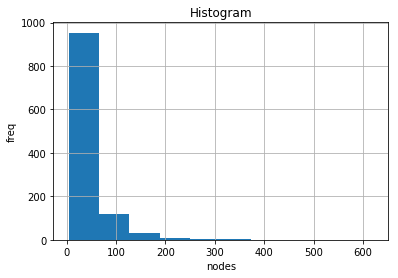

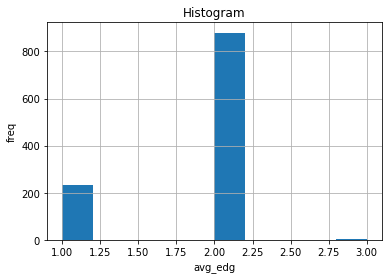

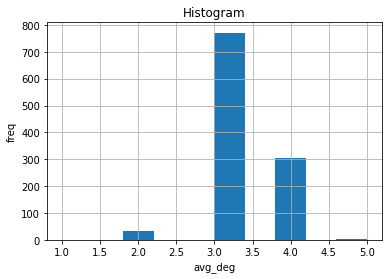

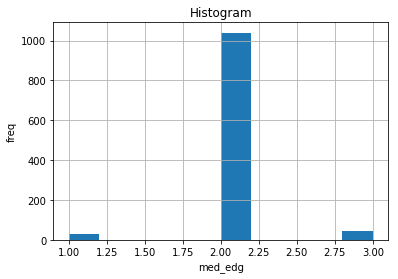

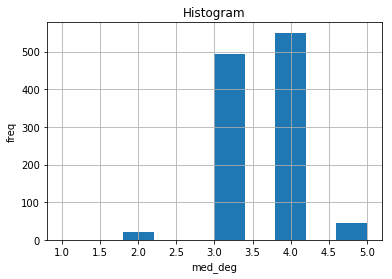

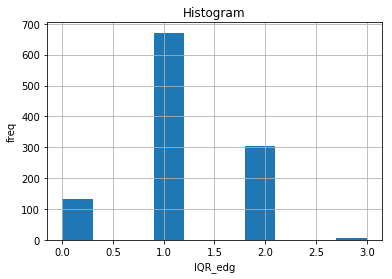

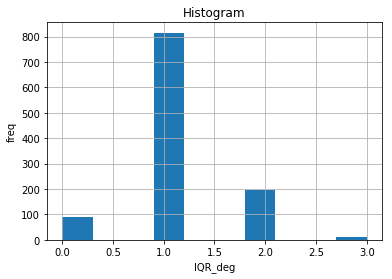

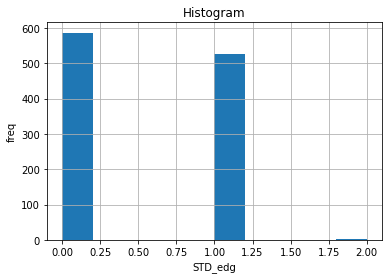

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f6aaf0cb400> (for post_execute):


KeyboardInterrupt: ignored

In [0]:
for col in df.columns:
    col_data = df[col]
    plt.hist(col_data)
    plt.xlabel(col)
    plt.ylabel('freq')
    plt.title('Histogram')
    plt.grid(True)
    plt.show()

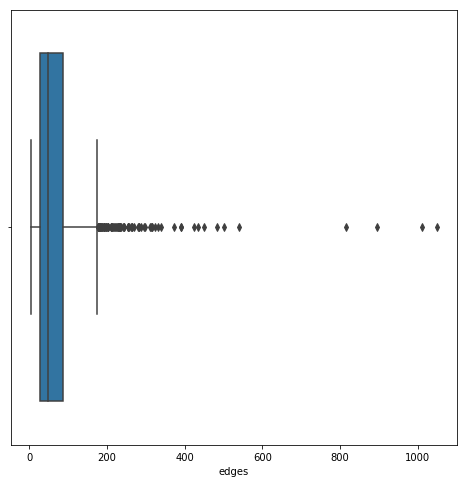

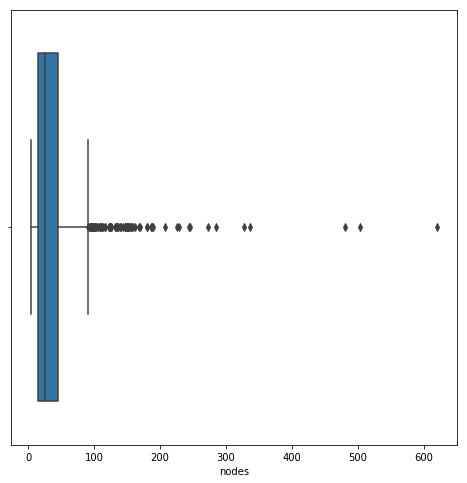

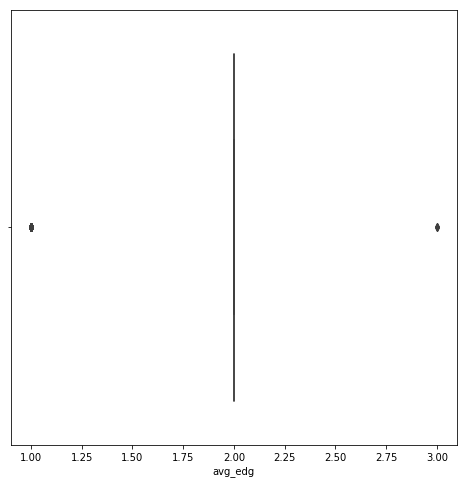

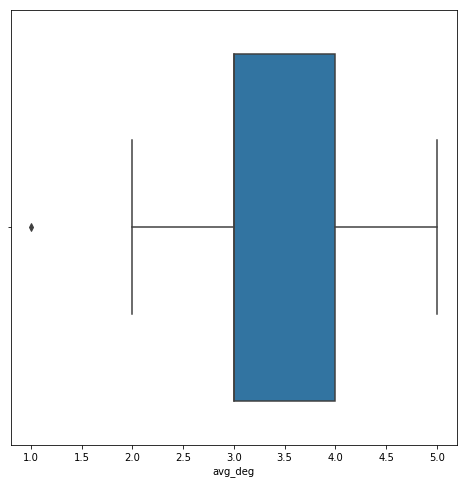

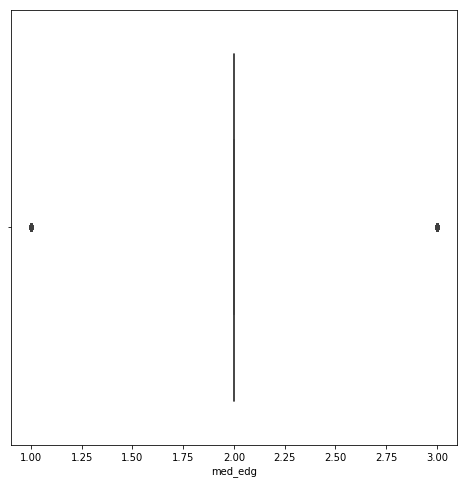

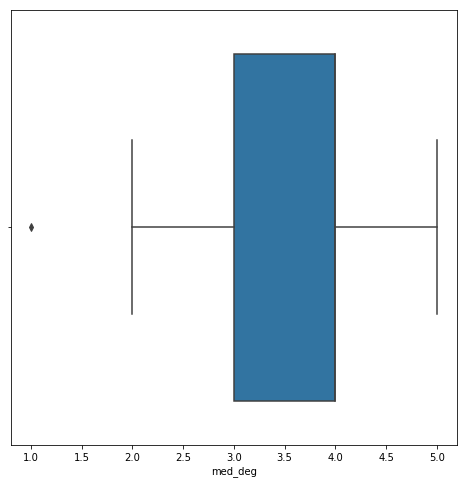

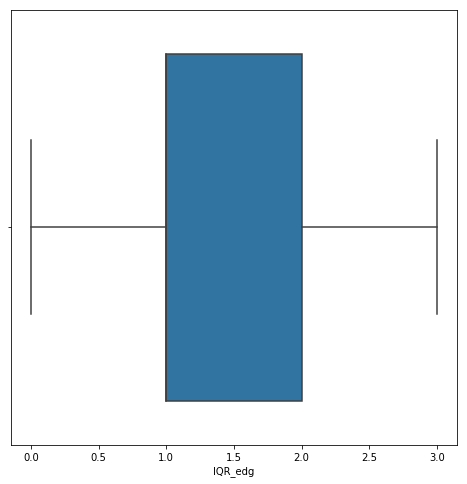

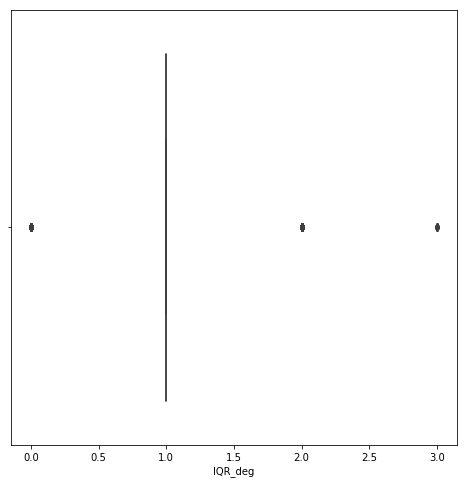

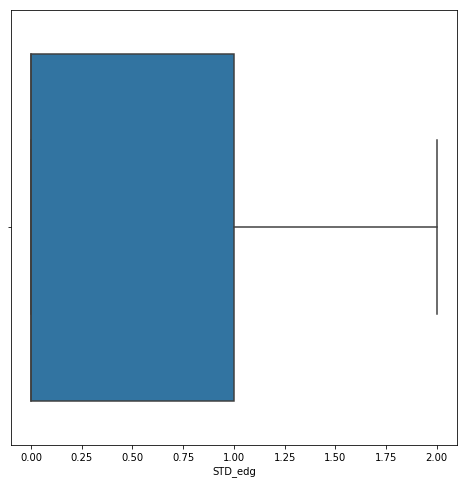

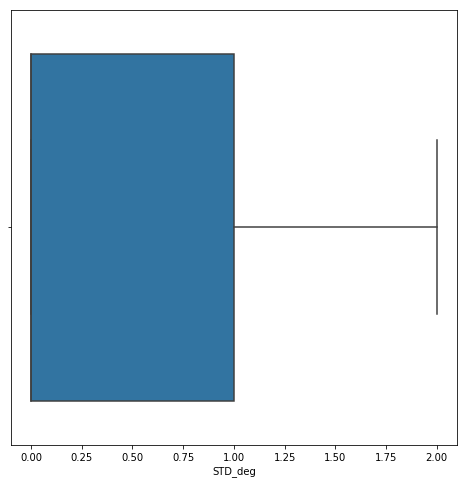

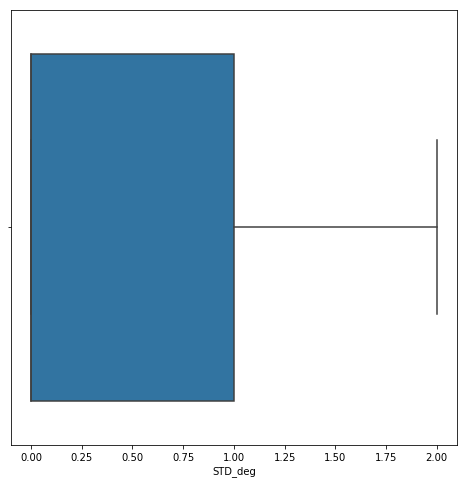

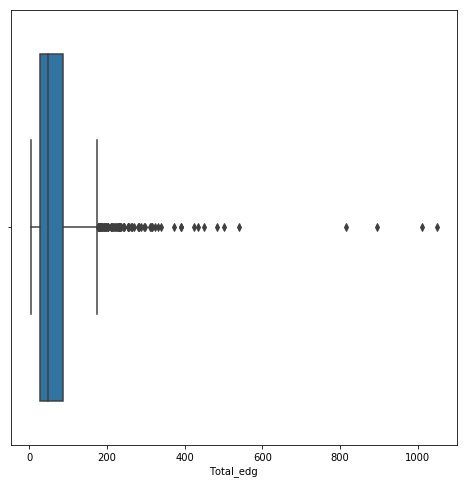

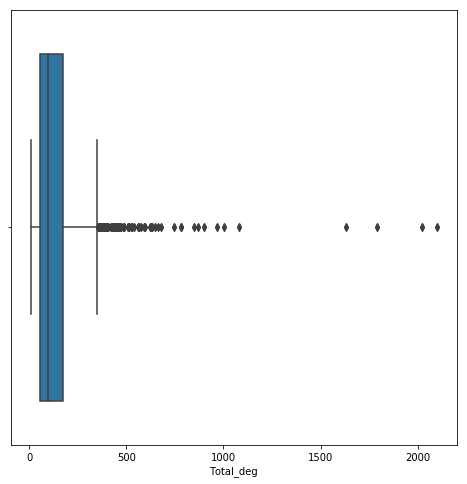

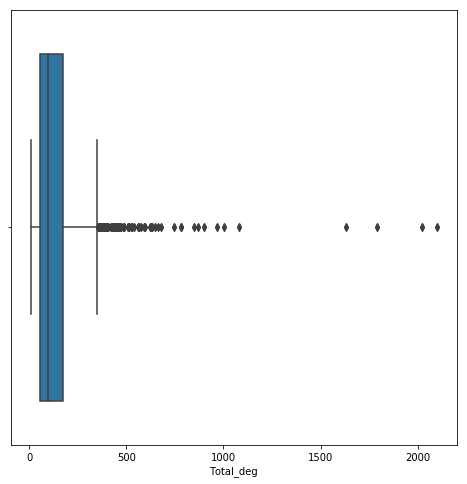

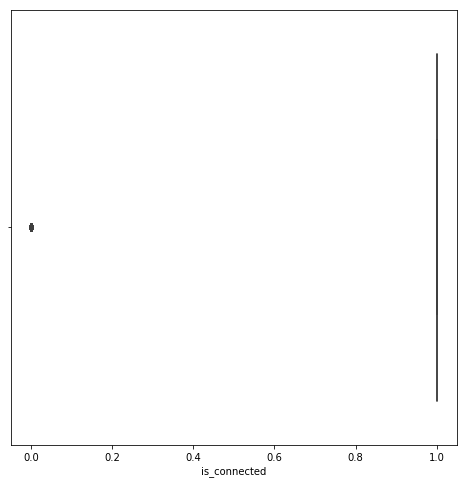

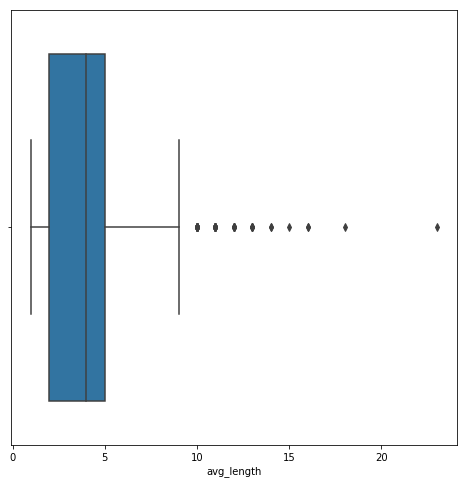

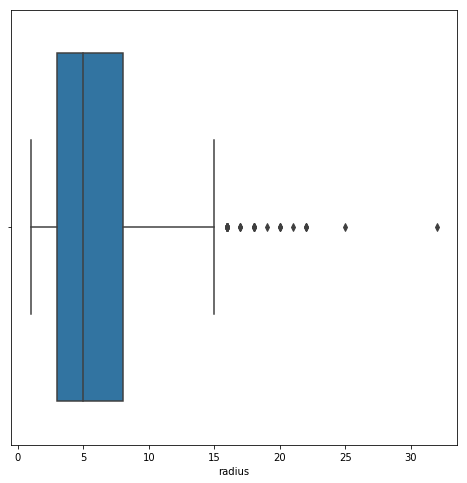

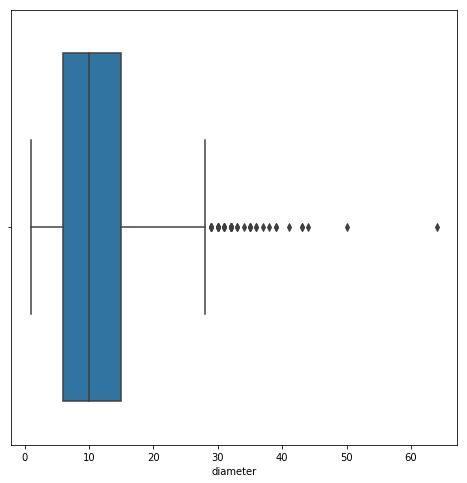

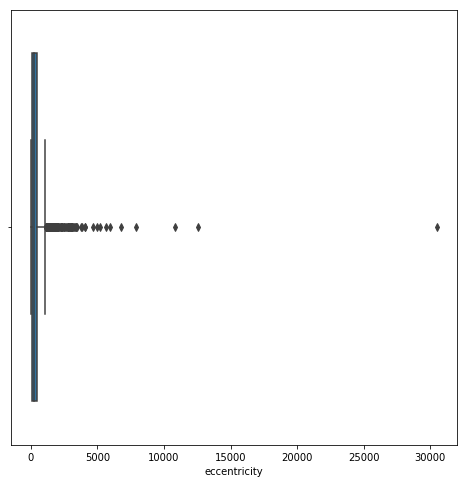

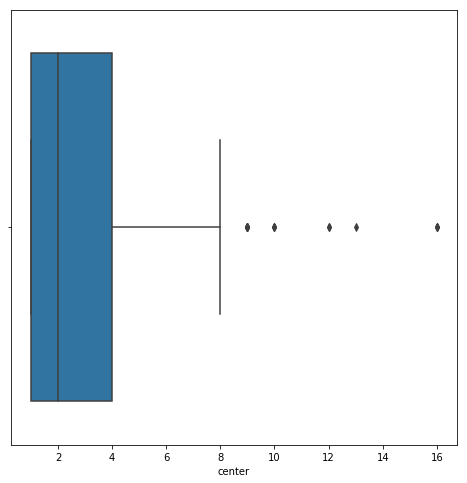

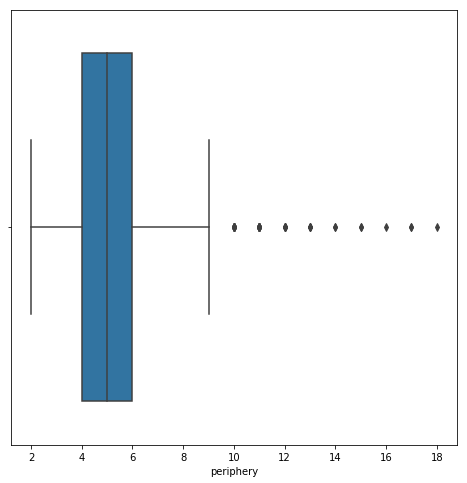

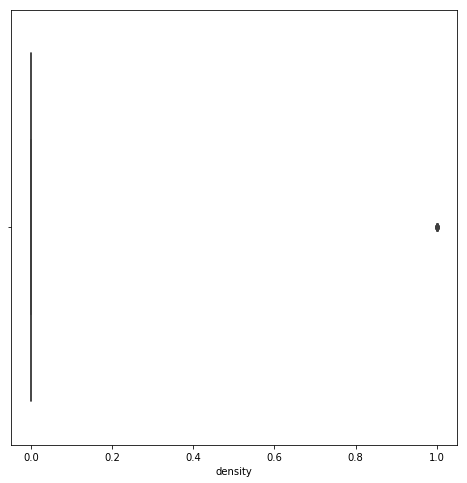

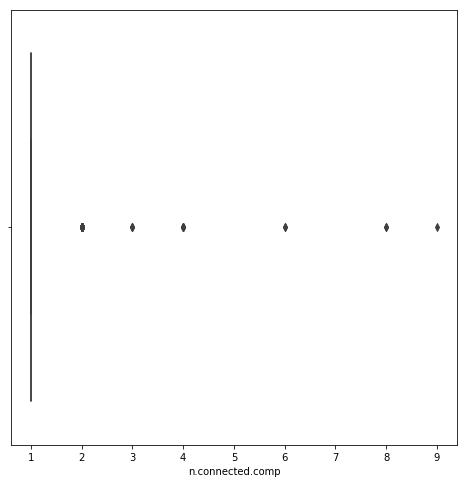

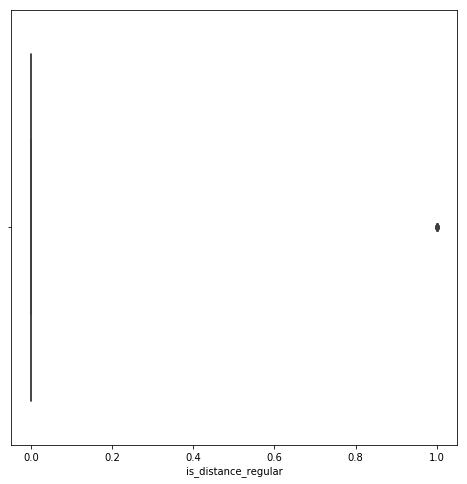

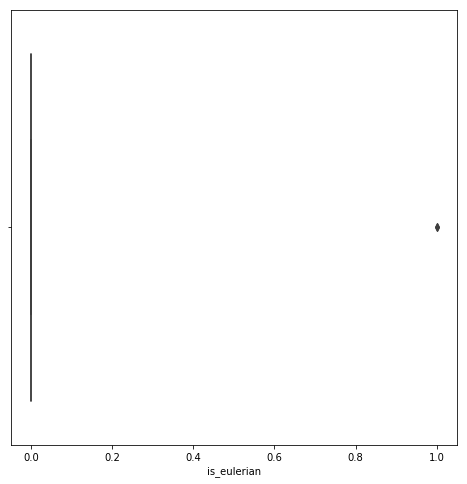

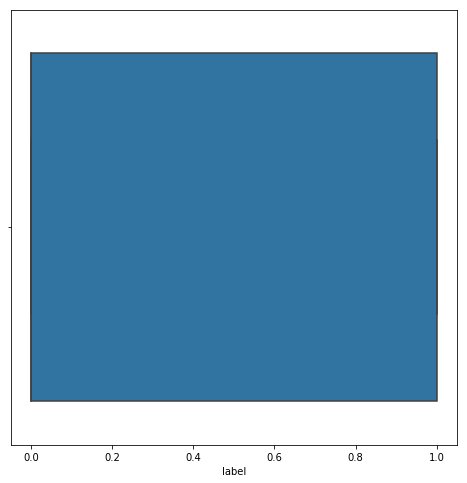

In [0]:
# Boxplot
for col in df.columns:
    sns.boxplot(df[col])
    plt.xlabel(col)
    fig=plt.gcf()
    fig.set_size_inches(8,8)
    plt.show()

### Multicollinearity

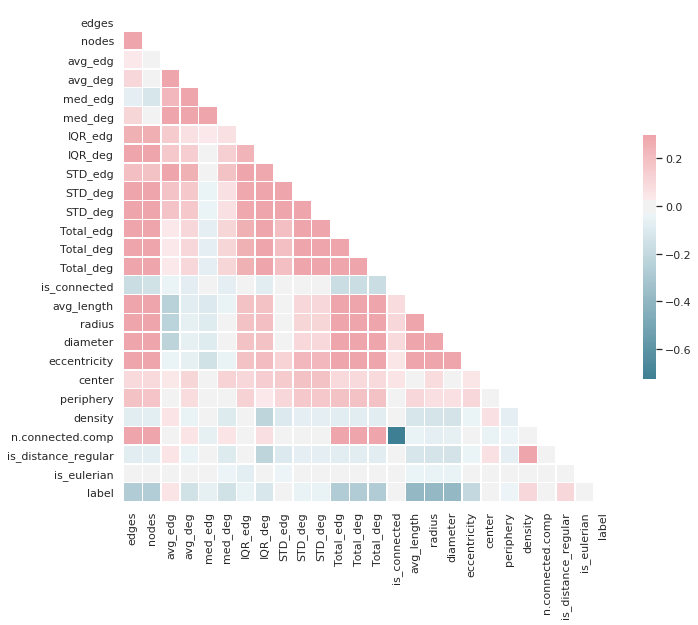

In [0]:
# Compute the correlation matrix
sns.set(style="white")

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [0]:
df.corr()

,edges,nodes,avg_edg,avg_deg,med_edg,med_deg,IQR_edg,IQR_deg,STD_edg,STD_deg,STD_deg,Total_edg,Total_deg,Total_deg,is_connected,avg_length,radius,diameter,eccentricity,center,periphery,density,n.connected.comp,is_distance_regular,is_eulerian,label
edges,1.000000,0.984553,0.032233,0.100580,-0.065455,0.108198,0.256130,0.321020,0.197963,0.317047,0.317047,1.000000,1.000000,1.000000,-0.173985,0.669824,0.663774,0.662537,0.783369,0.092960,0.184223,-0.082454,0.351852,-0.082454,-0.028745,-0.272324
nodes,0.984553,1.000000,-0.025079,-0.002574,-0.124289,0.011555,0.260357,0.331695,0.189033,0.331057,0.331057,0.984553,0.984553,0.984553,-0.143213,0.698198,0.688615,0.685221,0.835506,0.094325,0.175906,-0.079980,0.301682,-0.079980,-0.028332,-0.263560
avg_edg,0.032233,-0.025079,1.000000,0.356231,0.224938,0.420304,0.150511,0.160109,0.354316,0.181093,0.181093,0.032233,0.032233,0.032233,-0.041421,-0.240194,-0.231947,-0.222895,-0.042606,0.041508,0.022284,0.052134,0.016241,0.052134,0.021188,0.054428
avg_deg,0.100580,-0.002574,0.356231,1.000000,0.349709,0.661375,0.068813,0.141843,0.254020,0.159980,0.159980,0.100580,0.100580,0.100580,-0.069947,-0.083653,-0.061359,-0.057703,-0.060788,0.110447,0.091395,-0.051072,0.053765,-0.051072,-0.020756,-0.145842
med_edg,-0.065455,-0.124289,0.224938,0.349709,1.000000,0.327568,0.033772,-0.015492,0.002056,-0.041945,-0.041945,-0.065455,-0.065455,-0.065455,0.008288,-0.098280,-0.088620,-0.086082,-0.146597,0.015950,0.027057,-0.004369,-0.060495,-0.004369,-0.001776,-0.063737
med_deg,0.108198,0.011555,0.420304,0.661375,0.327568,1.000000,0.071433,0.136518,0.187853,0.067310,0.067310,0.108198,0.108198,0.108198,-0.067594,-0.051868,-0.021705,-0.016602,-0.049615,0.120472,-0.006949,-0.094617,0.053478,-0.094617,-0.038453,-0.141277
IQR_edg,0.256130,0.260357,0.150511,0.068813,0.033772,0.071433,1.000000,0.237444,0.375360,0.279970,0.279970,0.256130,0.256130,0.256130,0.007160,0.186307,0.190250,0.184285,0.187771,0.099873,0.125514,-0.027781,0.001253,-0.027781,-0.079584,-0.049478
IQR_deg,0.321020,0.331695,0.160109,0.141843,-0.015492,0.136518,0.237444,1.000000,0.289730,0.456675,0.456675,0.321020,0.321020,0.321020,-0.082104,0.189829,0.195934,0.190520,0.215320,0.143689,0.034105,-0.218896,0.075060,-0.218896,-0.009047,-0.115432
STD_edg,0.197963,0.189033,0.354316,0.254020,0.002056,0.187853,0.375360,0.289730,1.000000,0.468828,0.468828,0.197963,0.197963,0.197963,0.018395,-0.027585,-0.022473,-0.027526,0.120497,0.149587,0.101107,-0.098653,0.000091,-0.098653,-0.040093,-0.003661
STD_deg,0.317047,0.331057,0.181093,0.159980,-0.041945,0.067310,0.279970,0.456675,0.468828,1.000000,1.000000,0.317047,0.317047,0.317047,0.013748,0.106193,0.109584,0.099311,0.227670,0.184660,0.156558,-0.066762,0.007287,-0.066762,0.019043,-0.050030


In [0]:
co = corr.unstack()

#### Positive correlation

In [0]:
sort_cor = co.sort_values(kind="quicksort")
pd.DataFrame(sort_cor[sort_cor > 0.8])


0
eccentricity        nodes                0.835506
nodes               eccentricity         0.835506
                    Total_deg            0.984553
Total_edg           nodes                0.984553
nodes               Total_edg            0.984553
Total_deg           nodes                0.984553
edges               nodes                0.984553
nodes               Total_deg            0.984553
Total_deg           nodes                0.984553
nodes               edges                0.984553
radius              avg_length           0.987999
avg_length          radius               0.987999
                    diameter             0.989839
diameter            avg_length           0.989839
                    radius               0.996331
radius              diameter             0.996331
is_eulerian         is_eulerian          1.000000
edges               edges                1.000000
is_distance_regular density              1.000000
Total_edg           edges                1.000000
STD_deg             STD_deg              1.000000
                    STD_deg              1.000000
                    STD_deg              1.000000
                    STD_deg              1.000000
STD_edg             STD_edg              1.000000
IQR_deg             IQR_deg              1.000000
Total_edg           Total_edg            1.000000
IQR_edg             IQR_edg              1.000000
med_edg             med_edg              1.000000
avg_deg             avg_deg              1.000000
avg_edg             avg_edg              1.000000
nodes               nodes                1.000000
edges               Total_deg            1.000000
                    Total_deg            1.000000
                    Total_edg            1.000000
med_deg             med_deg              1.000000
Total_edg           Total_deg            1.000000
                    Total_deg            1.000000
Total_deg           edges                1.000000
n.connected.comp    n.connected.comp     1.000000
density             is_distance_regular  1.000000
                    density              1.000000
periphery           periphery            1.000000
center              center               1.000000
eccentricity        eccentricity         1.000000
diameter            diameter             1.000000
radius              radius               1.000000
avg_length          avg_length           1.000000
is_connected        is_connected         1.000000
Total_deg           Total_deg            1.000000
                    Total_deg            1.000000
                    Total_edg            1.000000
                    edges                1.000000
                    Total_deg            1.000000
                    Total_deg            1.000000
                    Total_edg            1.000000
is_distance_regular is_distance_regular  1.000000
label               label                1.000000

#### Negative correlation

In [0]:
sort_cor = co.sort_values(kind="quicksort")
pd.DataFrame(sort_cor[sort_cor < -0.8])

,,0


In [0]:
df=df.drop(["is_distance_regular","Total_edg", "avg_length"],axis=1)

### Classification Model

In [0]:
#Normalaize the data
from sklearn.preprocessing import MinMaxScaler,StandardScaler

orig_df=df.copy()
scaler = MinMaxScaler()
scaler.fit(df)
data=scaler.transform(df)

In [0]:
tr_rows=labels_train.loc[:,'graph']-1
te_rows=labels_test.loc[:,'graph']-1

In [0]:
train = data[tr_rows,:]
test = data[te_rows,:]

In [0]:
print(train.shape)
print(test.shape)

(992, 23)
(121, 23)


In [0]:
train_set = train[:,:-1]  # Independent features
train_labels = train[:,-1] # Target feature
test_set = test[:,:-1]  # Independent features
test_labels = test[:,-1] # Target feature

In [0]:
import lightgbm as lgb
lgb_train = lgb.Dataset(train_set, train_labels, free_raw_data=False)
lgb_test = lgb.Dataset(test_set, test_labels, reference=lgb_train, free_raw_data=False)

In [0]:
#Select Hyper-Parameters
params = {'boosting_type': 'gbdt',
          'max_depth' : 20,
          'objective': 'binary',
          'nthread': 5,
          'num_leaves': 65,
          'learning_rate': 0.03,
          'max_bin': 512,
          'subsample_for_bin': 200,
          'subsample': 1,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'reg_alpha': 1.2,
          'reg_lambda': 1.2,
          'min_split_gain': 0.5,
          'min_child_weight': 1,
          'min_child_samples': 5,
          'is_unbalance': True,
          'num_class' : 1,
          'metric' : 'binary_error',
          }

# Create parameters to search
gridParams = {
    'learning_rate': [0.03],
    'n_estimators': [500],
    'num_leaves': [20, 24, 27],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'random_state' : [501], 
    'colsample_bytree' : [0.64, 0.65],
    'subsample' : [0.5,0.75],
    'reg_alpha' : [1, 1.2],
    'reg_lambda' : [1.2, 1.4],
    }

# Create classifier to use
mdl = lgb.LGBMClassifier(boosting_type= 'gbdt',
          objective = 'binary',
          n_jobs = 5, 
          silent = True,
          max_depth = params['max_depth'],
          max_bin = params['max_bin'],
          subsample_for_bin = params['subsample_for_bin'],
          subsample = params['subsample'],
          subsample_freq = params['subsample_freq'],
          min_split_gain = params['min_split_gain'],
          min_child_weight = params['min_child_weight'],
          min_child_samples = params['min_child_samples'],)

In [0]:
# Create the grid
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(mdl, gridParams, verbose=2, cv=4, n_jobs=-1)

In [0]:
# Run the grid
grid.fit(train_set, train_labels)

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

Fitting 4 folds for each of 48 candidates, totalling 192 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed:  2.2min finished


{'boosting_type': 'gbdt', 'colsample_bytree': 0.64, 'learning_rate': 0.03, 'n_estimators': 500, 'num_leaves': 20, 'objective': 'binary', 'random_state': 501, 'reg_alpha': 1.2, 'reg_lambda': 1.4, 'subsample': 0.75}
0.7167338709677419


In [0]:
# Using parameters already set above, replace in the best from the grid search
params['colsample_bytree'] = grid.best_params_['colsample_bytree']
params['learning_rate'] = grid.best_params_['learning_rate']
params['n_estimators'] = grid.best_params_['n_estimators']
params['objective'] = grid.best_params_['objective']
params['random_state'] = grid.best_params_['random_state']
params['subsample'] = grid.best_params_['subsample']

In [0]:
%%time
lgbm = lgb.train(params, lgb_train, num_boost_round=300)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


CPU times: user 1.35 s, sys: 568 ms, total: 1.92 s
Wall time: 1.47 s


In [0]:
y_prob = lgbm.predict(test_set)

In [0]:
y_pred = np.where(y_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output  

### Model Evaluation

<Figure size 432x288 with 0 Axes>

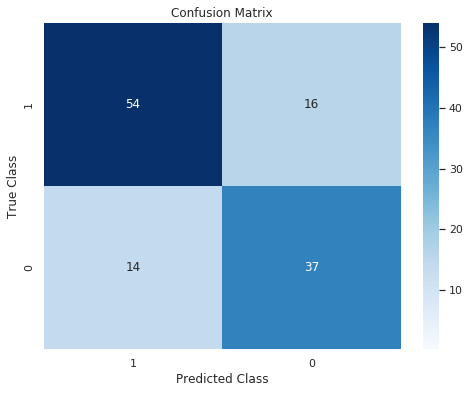

In [0]:
#Print Confusion Matrix
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_curve, roc_auc_score

plt.figure()
cm = confusion_matrix(test_labels, y_pred)
labels = ['1', '0']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

#### Precision , Recall and F1 score

In [0]:
y_prob = pd.DataFrame(y_prob)

In [0]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(test_labels, y_prob)

In [0]:
# calculate AUC
auc = roc_auc_score(test_labels, y_prob)
print('AUC: %.3f' % auc)

AUC: 0.854


In [0]:
print("Recall: {0}".format(round(recall_score(test_labels, y_pred),4)))

Recall: 0.7255


In [0]:
print("Precision: {0}".format(round(precision_score(test_labels, y_pred),4)))

Precision: 0.6981


In [0]:
# calculate F1 score
f1_score(test_labels, y_pred)

0.7115384615384615